In [2]:
# Imports
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm


# Working directory
main_folder = 'C://Users/emily/Git_Stuff/General_Assembly/04_Projects/project-4/'
repo_path = 'C://Users/emily/Git_Stuff/General_Assembly/04_Projects/project-4/dsb318-group4/'
datasets = 'C://Users/emily/Git_Stuff/General_Assembly/04_Projects/project-4/dsb318-group4/data/dataset_csvs'

os.chdir('C://Users/emily/Git_Stuff/General_Assembly/04_Projects/project-4')
print(f'Current working directory is {os.getcwd()}')

Current working directory is C:\Users\emily\Git_Stuff\General_Assembly\04_Projects\project-4


In [3]:
os.chdir(datasets)

In [4]:
df = pd.read_csv('ca_dropout_and_predictors_v3-2.csv')
df.columns

Index(['county', 'abortion_medicaid_expenditures', 'abortion_rs_count_total',
       'abortion_rs_count_total_suppressed',
       'daycare_slots_child_facility_capacity',
       'daycare_slots_child_total_pop', 'daycare_slots_child_rate_slots',
       'daycare_slots_child_num_facility', 'daycare_slots_child_pct_nonwhite',
       'daycare_slots_infant_facility_capacity',
       'daycare_slots_infant_total_pop', 'daycare_slots_infant_rate_slots',
       'daycare_slots_infant_num_facility',
       'daycare_slots_infant_pct_nonwhite', 'graduation_2019_cohort_size',
       'dropout_rate_2019_cohort', 'ecigs_sold_pct_tobacco_stores_2016',
       'ecigs_sold_pct_tobacco_stores_2013', 'povr_whole_total_estimate',
       'adolescent_birth_abr', 'asthma_number_of_deaths',
       'asthma_age_adjusted_mortality_rate', 'asthma_surpressed',
       'infant_mortality_rate', 'std_chlamydia_rate',
       'std_chlamydia_supressed', 'std_gonorrhea_rate',
       'std_gonorrhea_supressed', 'std_population',

In [5]:
from string import capwords
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
os.getcwd()

'C:\\Users\\emily\\Git_Stuff\\General_Assembly\\04_Projects\\project-4\\dsb318-group4\\data\\dataset_csvs'

In [7]:
os.chdir('../../images')

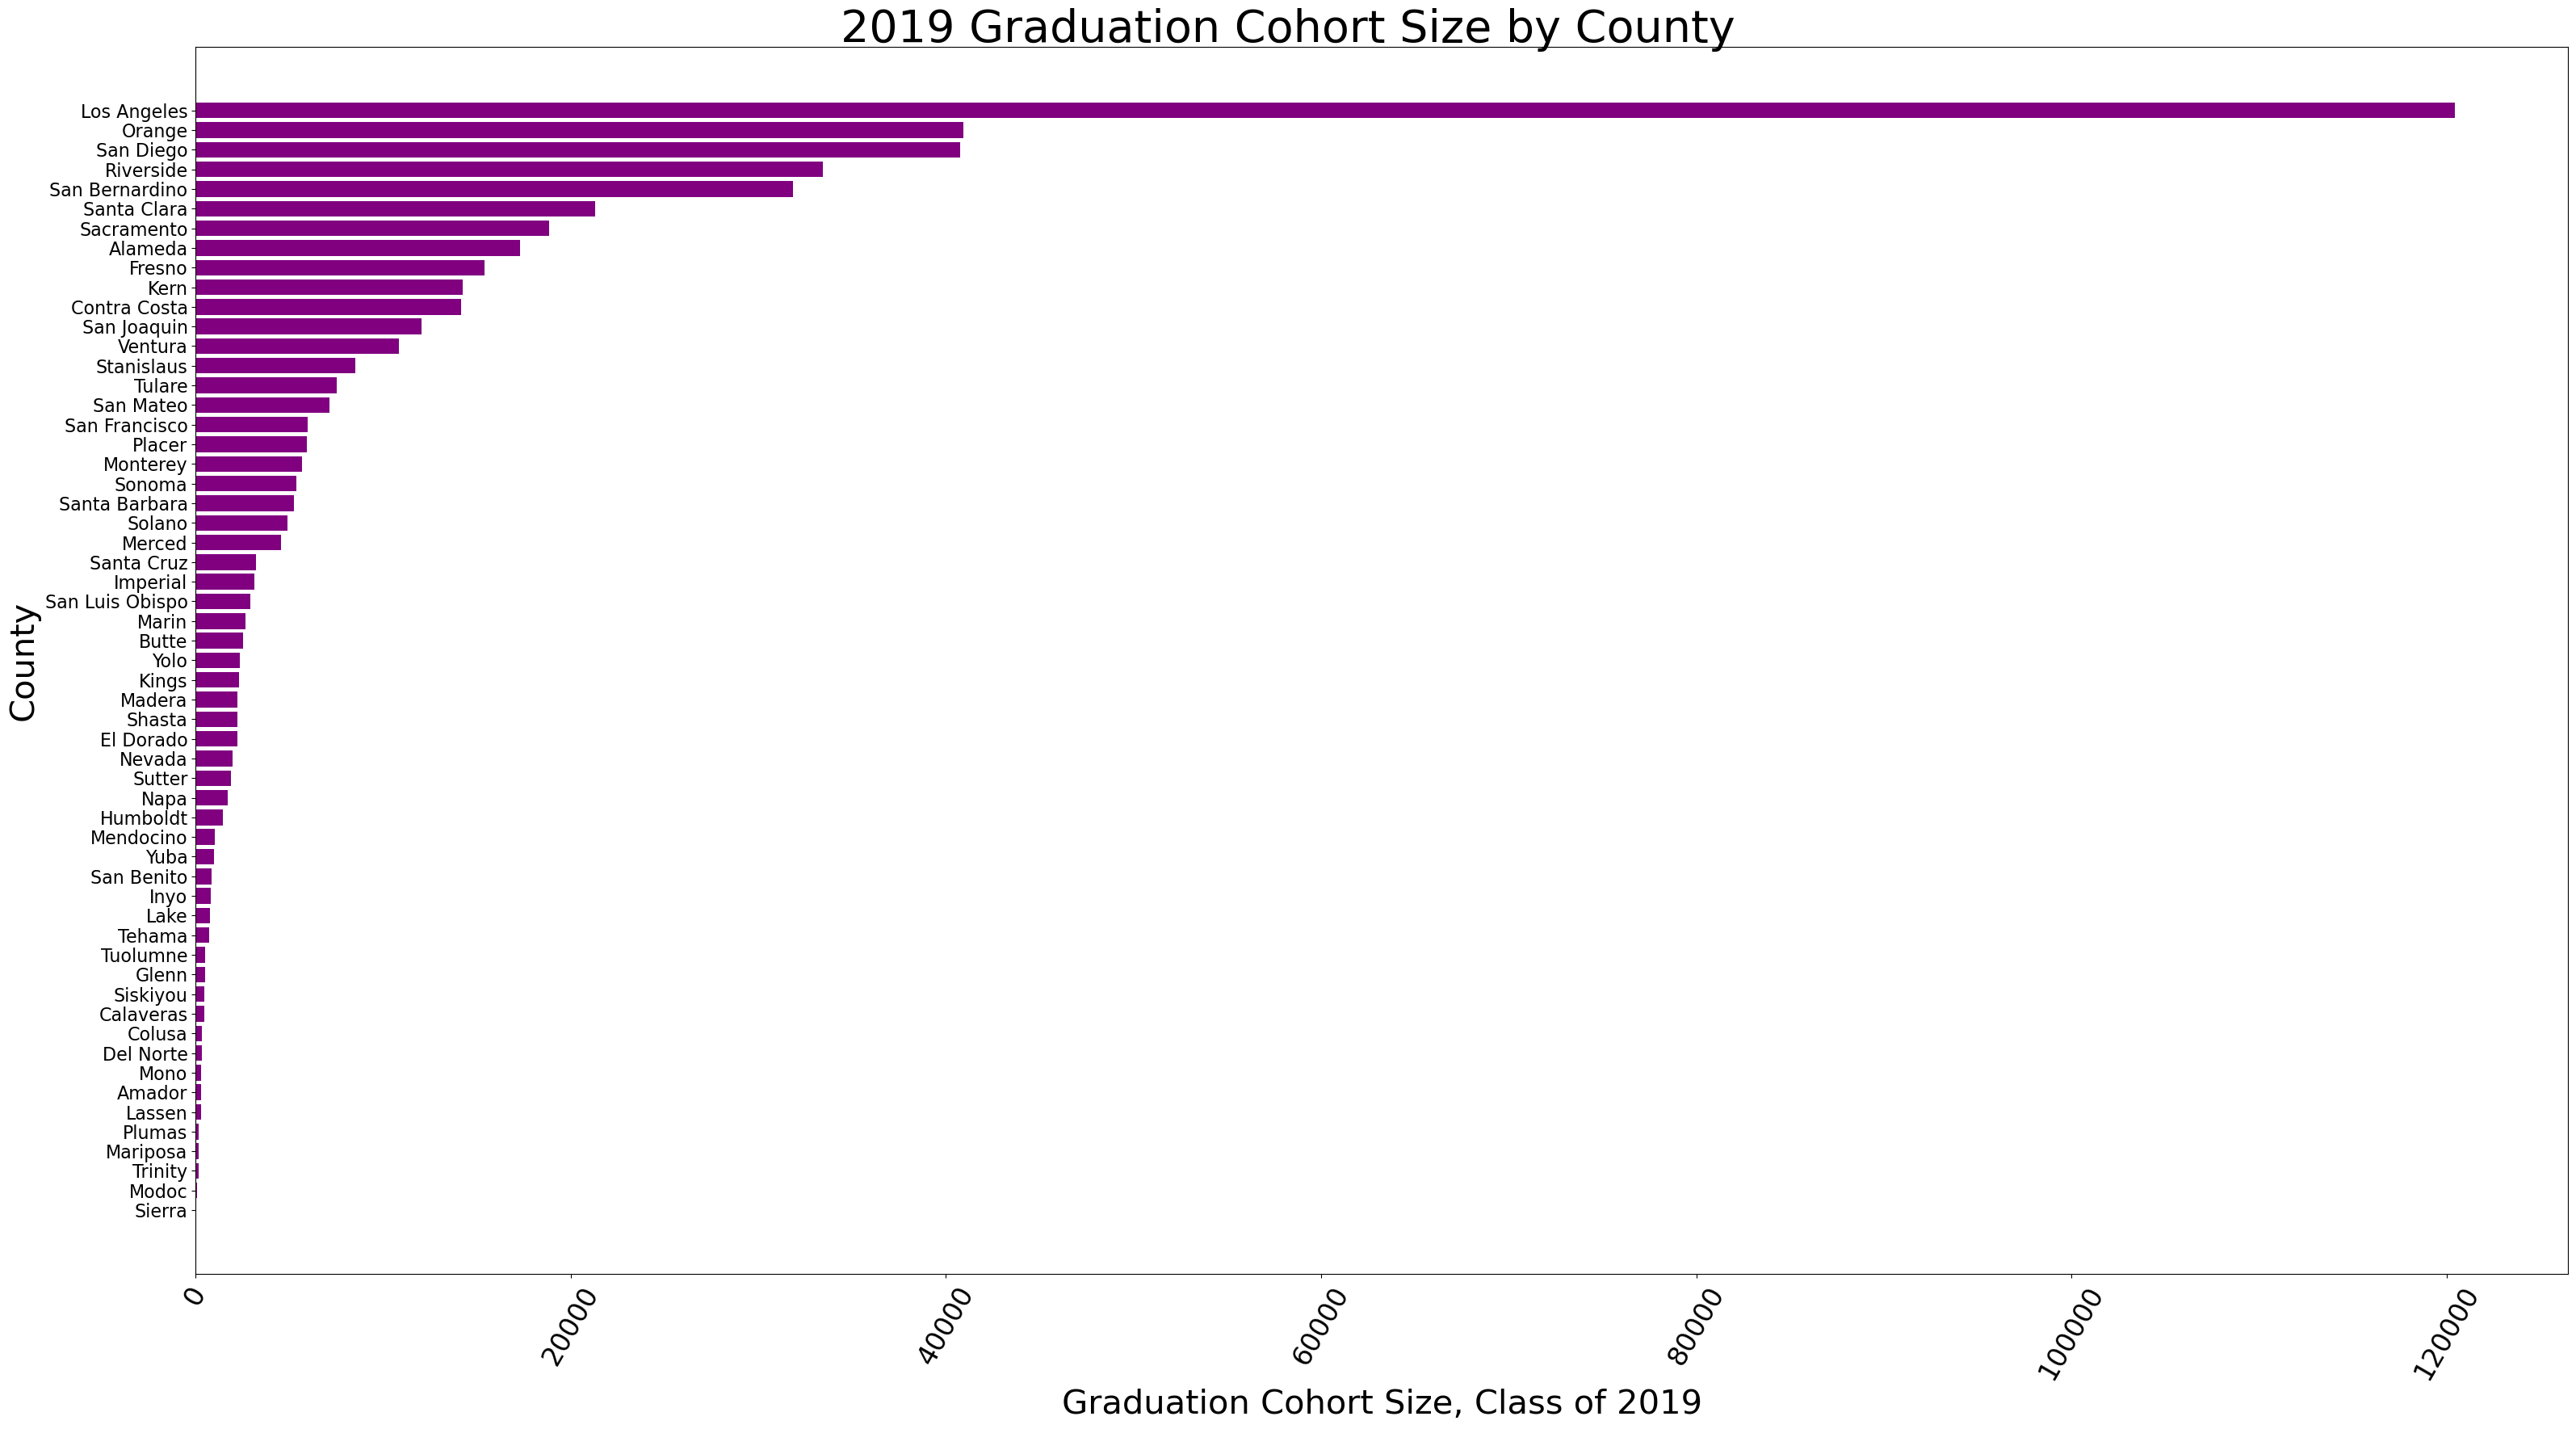

In [8]:
# Plot a bar graph of cohort size
cohorts = df[['county', 'graduation_2019_cohort_size']].sort_values(by = 'graduation_2019_cohort_size')

plt.figure(figsize = (32, 18));
plt.barh(y = cohorts['county'], width = cohorts[
  'graduation_2019_cohort_size'], height = .8, 
  align = 'center', color = 'purple');
plt.suptitle(f'2019 Graduation Cohort Size by County', size = 40)
#plt.title(f'Statewide Included Total: 494,317, 57 Counties', size = 18)
plt.xlabel(f'Graduation Cohort Size, Class of 2019', size = 30);
plt.ylabel('County', size = 30);
plt.xticks(size = 24, rotation = 60);
plt.yticks(size = 16)
plt.tight_layout()
plt.savefig(f'./graduation_cohort_size_by_county.png')

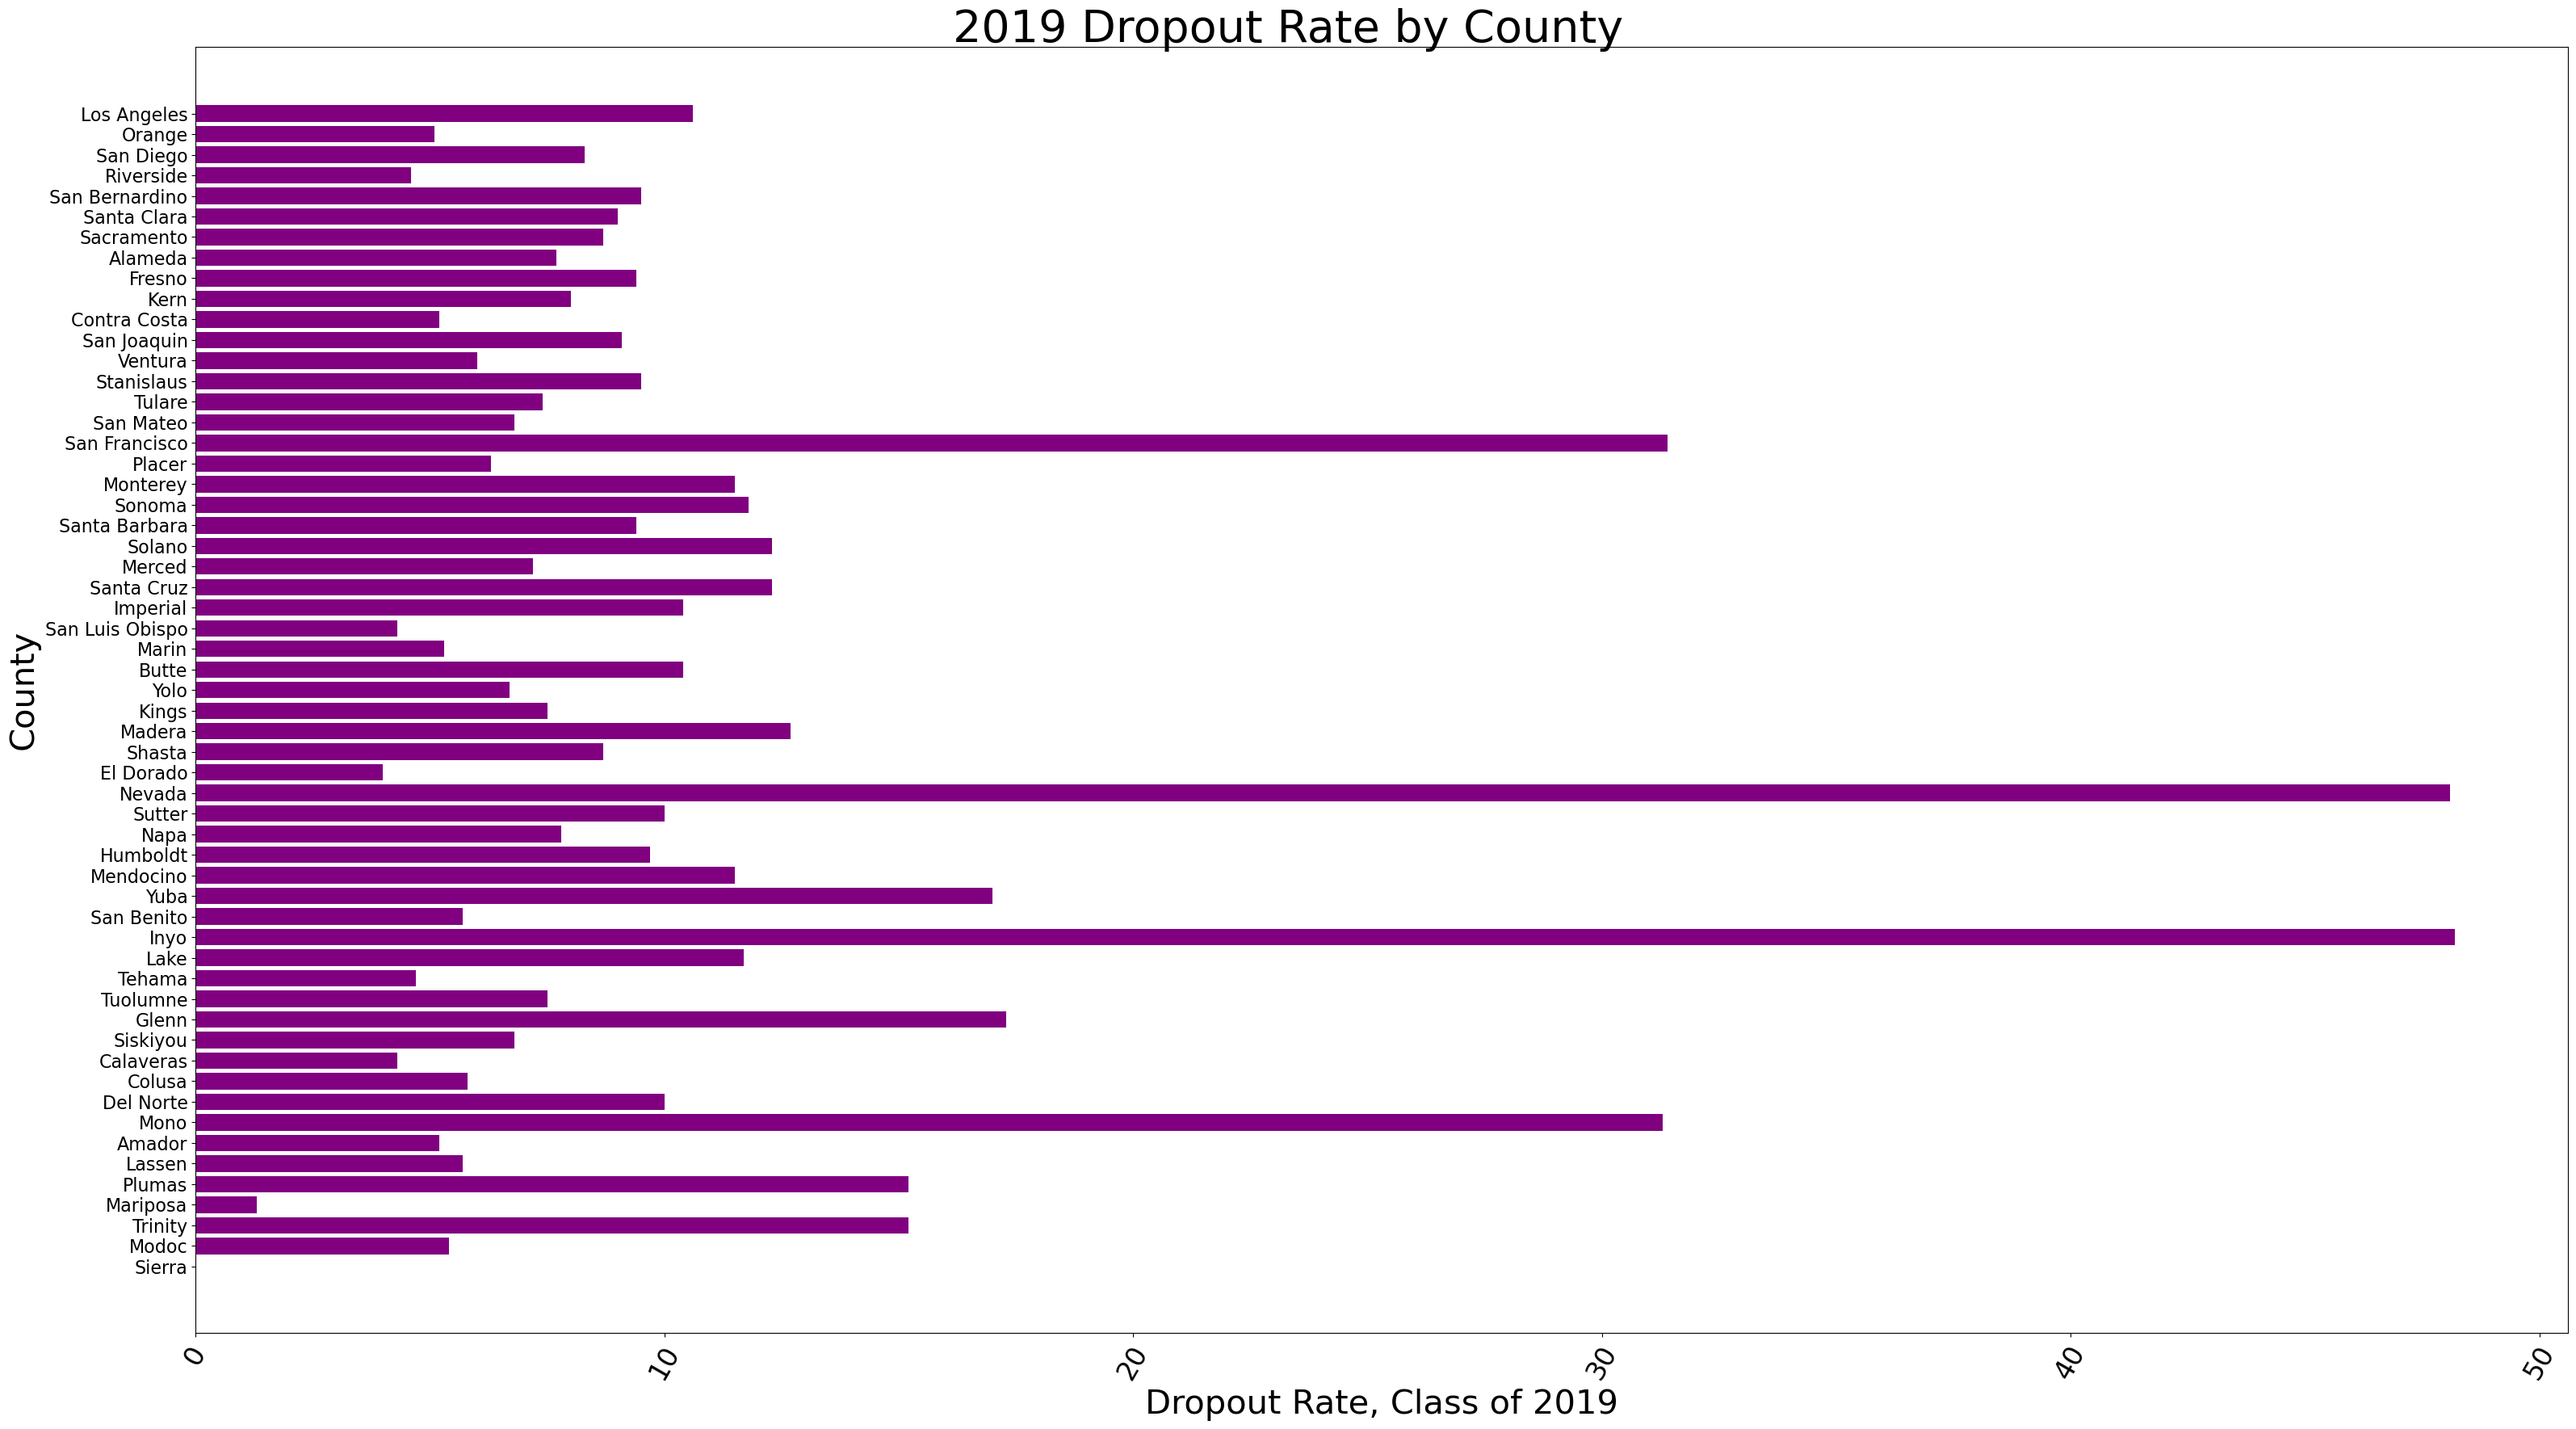

In [9]:
# Plot a bar graph of cohort size
cohorts = df[['county', 'graduation_2019_cohort_size', 'dropout_rate_2019_cohort']].sort_values(by = 'graduation_2019_cohort_size')

plt.figure(figsize = (32, 18));
plt.barh(y = cohorts['county'], width = cohorts[
  'dropout_rate_2019_cohort'], height = .8, 
  align = 'center', color = 'purple');
plt.suptitle(f'2019 Dropout Rate by County', size = 40)
#plt.title(f'Statewide Included Total: 494,317, 57 Counties', size = 18)
plt.xlabel(f'Dropout Rate, Class of 2019', size = 30);
plt.ylabel('County', size = 30);
plt.xticks(size = 24, rotation = 60);
plt.yticks(size = 16)
plt.tight_layout()
plt.savefig(f'./dropout_rate_by_county_sorted_by_cohort_size.png')

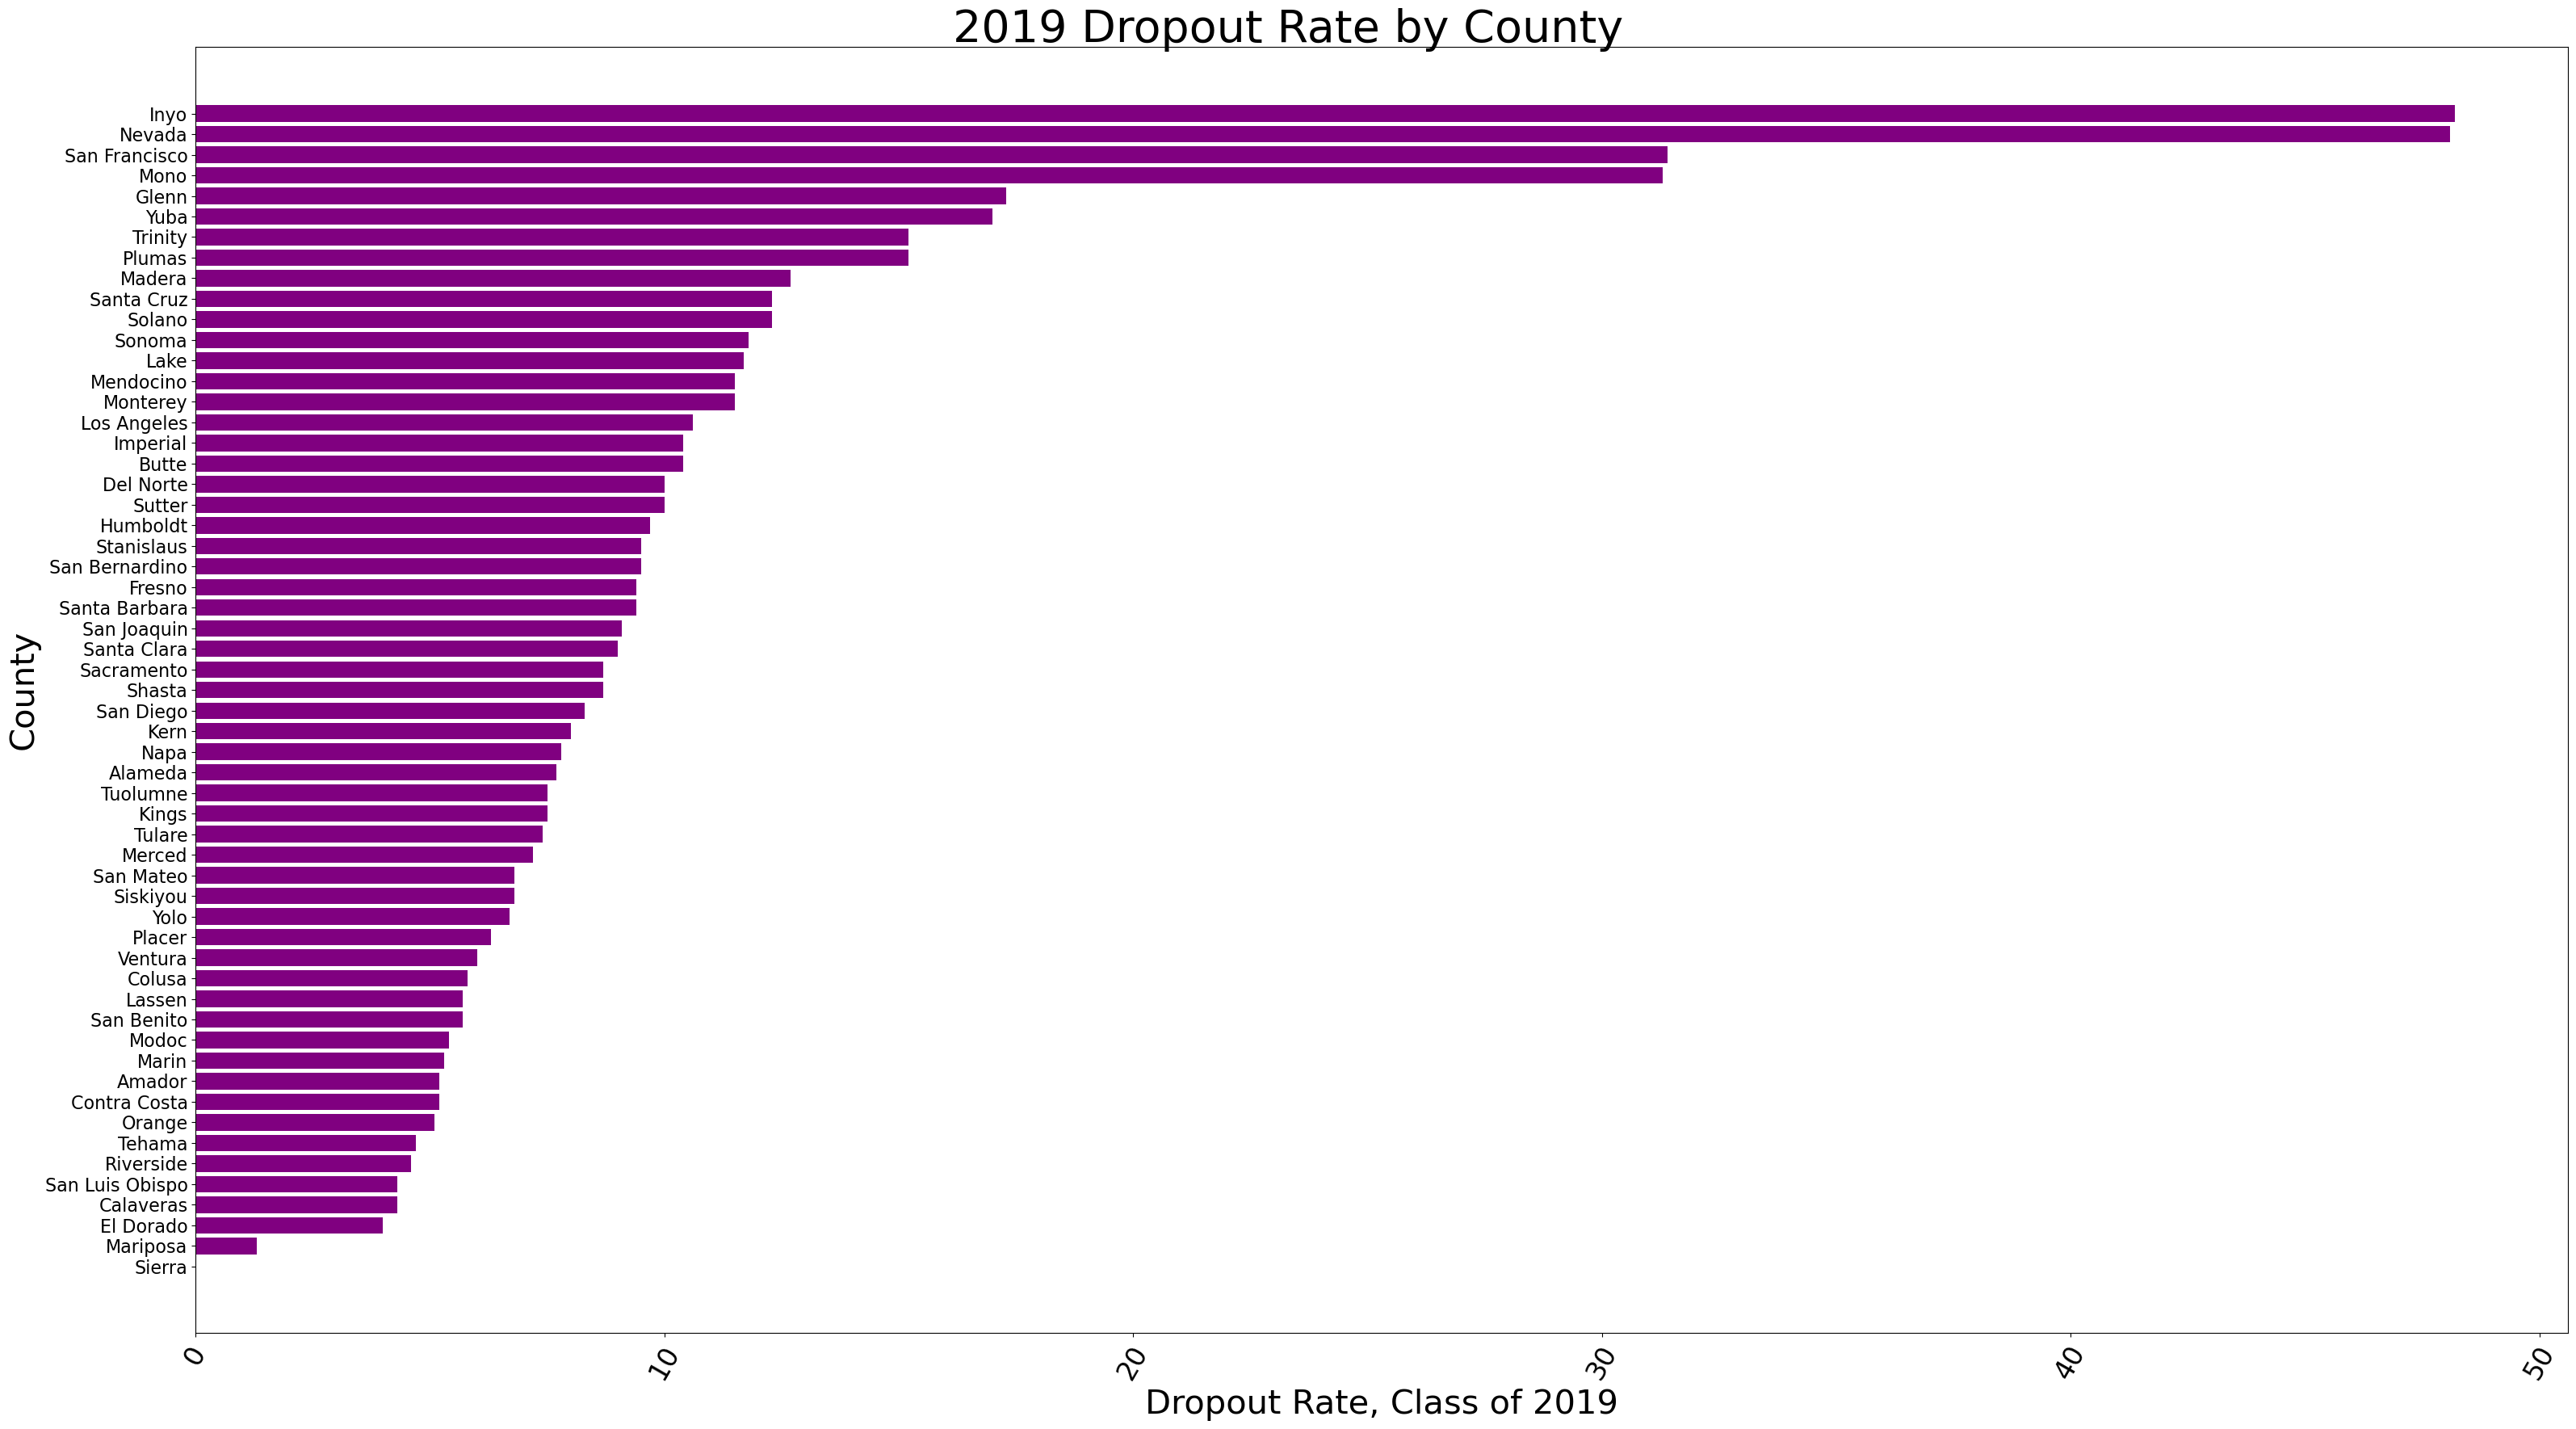

In [10]:
# Plot a bar graph of cohort size
cohorts = df[['county', 'dropout_rate_2019_cohort']].sort_values(by = 'dropout_rate_2019_cohort')

plt.figure(figsize = (32, 18));
plt.barh(y = cohorts['county'], width = cohorts[
  'dropout_rate_2019_cohort'], height = .8, 
  align = 'center', color = 'purple');
plt.suptitle(f'2019 Dropout Rate by County', size = 40)
#plt.title(f'Statewide Included Total: 494,317, 57 Counties', size = 18)
plt.xlabel(f'Dropout Rate, Class of 2019', size = 30);
plt.ylabel('County', size = 30);
plt.xticks(size = 24, rotation = 60);
plt.yticks(size = 16)
plt.tight_layout()
plt.savefig(f'./dropout_rate_by_county.png')

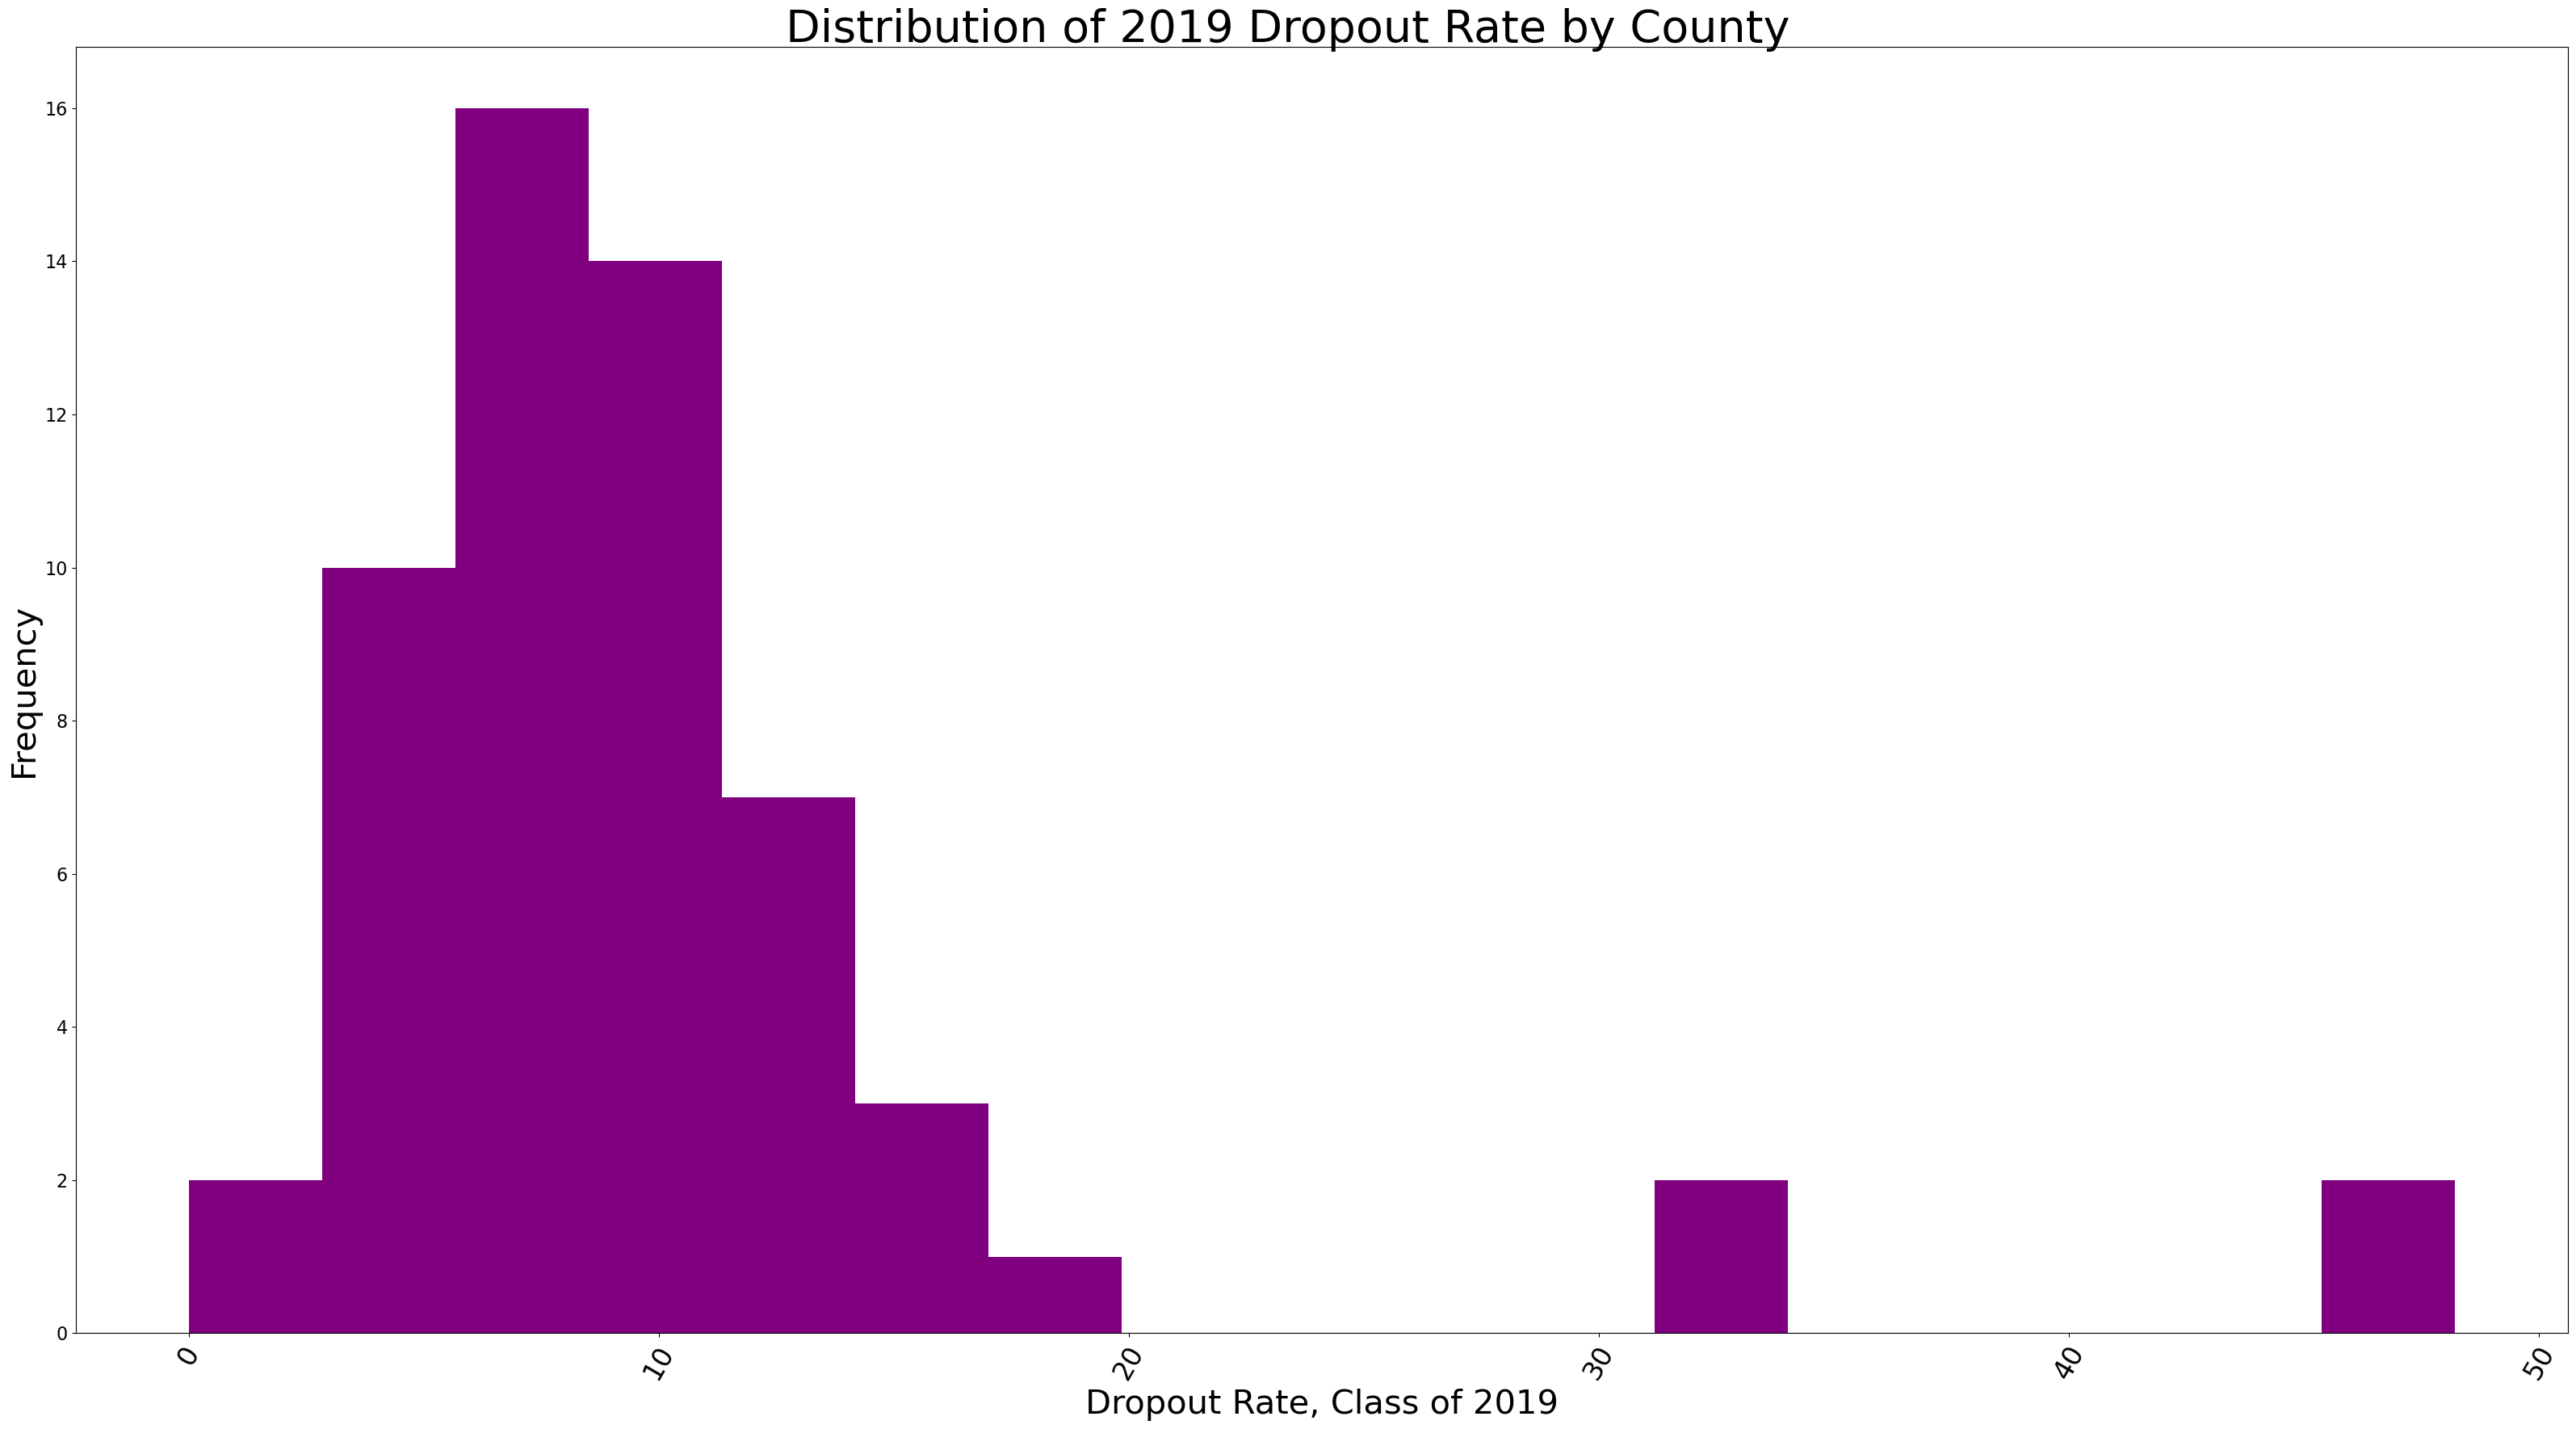

In [11]:
# Plot
cohorts = df[['county', 'dropout_rate_2019_cohort']].sort_values(by = 'dropout_rate_2019_cohort')
cohorts['dropout_not_zero'] = cohorts['dropout_rate_2019_cohort'] + 0.0001
cohorts['dropout_log'] =cohorts['dropout_not_zero'].map(np.log)

plt.figure(figsize = (32, 18));
plt.hist(cohorts['dropout_rate_2019_cohort'], color = 'purple', bins = 'auto');
plt.suptitle(f'Distribution of 2019 Dropout Rate by County', size = 40)
#plt.title(f'Statewide Included Total: 494,317, 57 Counties', size = 18)
plt.xlabel(f'Dropout Rate, Class of 2019', size = 30);
plt.ylabel('Frequency', size = 30);
plt.xticks(size = 24, rotation = 60);
plt.yticks(size = 16)
plt.tight_layout()
plt.savefig(f'./hist_dropout_rate_by_county.png')

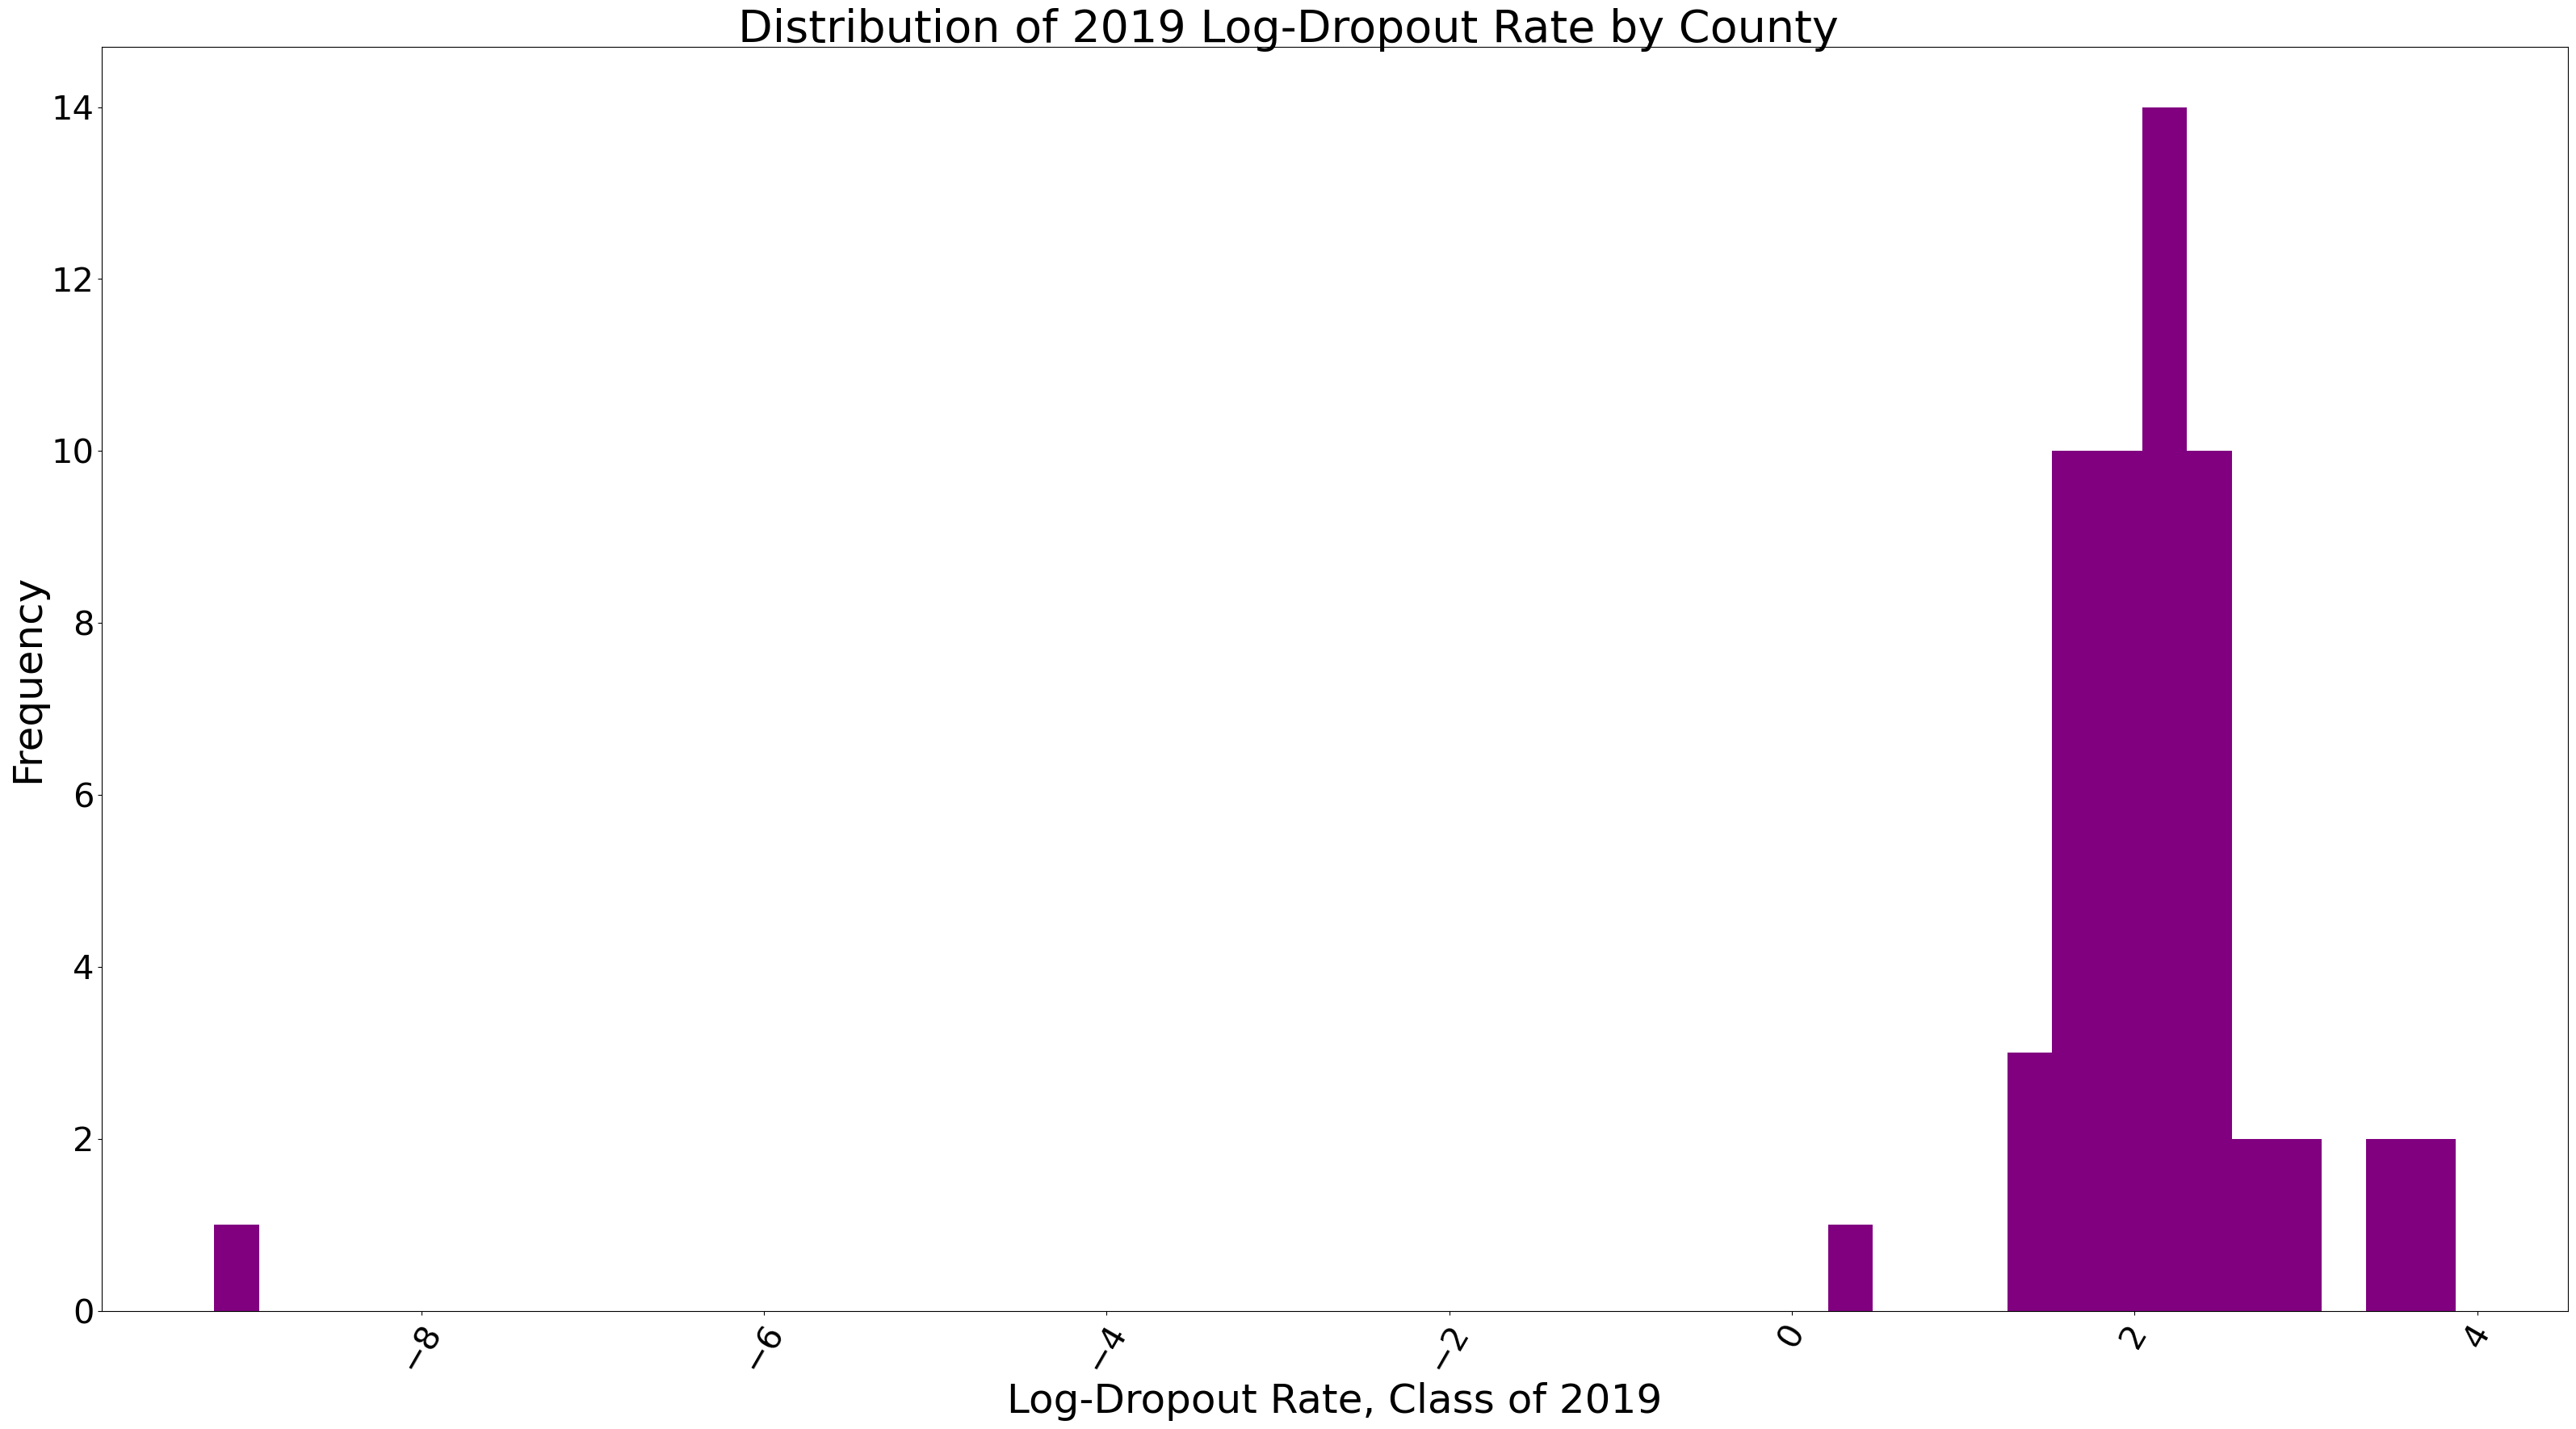

In [15]:
# Plot
cohorts = df[['county', 'dropout_rate_2019_cohort']].sort_values(by = 'dropout_rate_2019_cohort')
cohorts['dropout_not_zero'] = cohorts['dropout_rate_2019_cohort'] + 0.0001
cohorts['dropout_log'] =cohorts['dropout_not_zero'].map(np.log)

plt.figure(figsize = (32, 18));
plt.hist(cohorts['dropout_log'], color = 'purple', bins = 50);
plt.suptitle(f'Distribution of 2019 Log-Dropout Rate by County', size = 40)
#plt.title(f'Statewide Included Total: 494,317, 57 Counties', size = 18)
plt.xlabel(f'Log-Dropout Rate, Class of 2019', size = 36);
plt.ylabel('Frequency', size = 36);
plt.xticks(size = 30, rotation = 60);
plt.yticks(size = 30)
plt.tight_layout()
plt.savefig(f'./hist_log_dropout_rate_by_county.png')

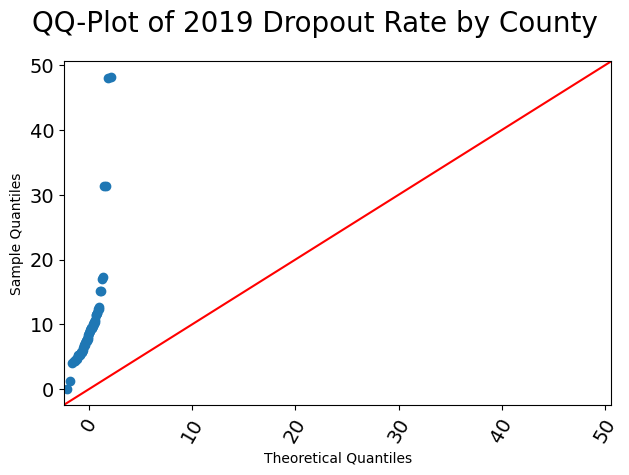

In [50]:
# QQplot of raw dropout rate
sm.qqplot(df['dropout_rate_2019_cohort'], line='45');
plt.suptitle(f'QQ-Plot of 2019 Dropout Rate by County', size = 20);
plt.xticks(size = 14, rotation = 60);
plt.yticks(size = 14);
plt.tight_layout();
plt.savefig('dropout_rate_qqplot.png')

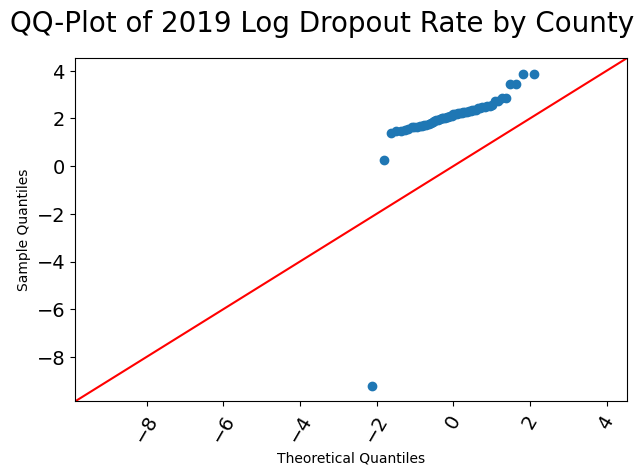

In [51]:
# QQ-plot of log-dropout-rate by county
sm.qqplot(cohorts['dropout_log'], line='45');
plt.suptitle(f'QQ-Plot of 2019 Log Dropout Rate by County', size = 20);
plt.xticks(size = 14, rotation = 60);
plt.yticks(size = 14);
plt.tight_layout();
plt.savefig('log_dropout_rate_qqplot.png')